In [220]:
import pyfits 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import astropy 
from astropy import cosmology 
import math as mt
from scipy.integrate import quad
from scipy.stats import chi2_contingency
from pylab import *
from scipy.optimize import curve_fit
import scipy as sp
import scipy.special
import scipy.stats as stats
import seaborn as sns
import pandas as pd
from astropy.modeling.models import Sersic1D
#http://seaborn.pydata.org/generated/seaborn.regplot.html documentation 

In [241]:
f = open('/Users/jennifercooper/Documents/Gal_Ev/D4000_size/field_size_n.txt', 'r')
lines = f.readlines()[1:]
f.close()

f_re_er = [] 
f_re    = []
f_n     = []
f_n_er  = []
f_z     = []
f_dk    = []
f_lmass = []
f_flag  = []
f_ans_re_1 =[]
f_dk_p  = []
f_dk_n = []
f_re_kpca = []

for line in lines: 
    a = line.split()
    f_z.append(float(a[16]))
    f_re.append(float(a[6]))
    f_re_er.append(float(a[7]))
    f_n.append(float(a[8]))
    f_n_er.append(float(a[9]))
    f_dk.append(float(a[32]))
    f_lmass.append(float(a[21]))
    f_flag.append(float(a[36]))
    f_dk_p.append(float(a[33]))
    f_dk_n.append(float(a[34]))
    f_re_kpca.append(float(a[37]))
    
f_re    = np.array(f_re)
f_re_er = np.array(f_re_er)
f_n     = np.array(f_n)
f_n_er  = np.array(f_n_er)
f_z     = np.array(f_z)
f_dk    = np.array(f_dk)
f_lmass = np.array(f_lmass)
f_flag  = np.array(f_flag) #greater than 0.9 (1) is SF, less than is Q
f_dk_p  = np.array(f_dk_p)
f_dk_n  = np.array(f_dk_n)

f_dk_err = (f_dk_p + f_dk_n)/2.
#print f_dk_err



from astropy.cosmology import WMAP9 as cosmo
#convert from logbase 
f_mass = 10**(f_lmass)
f_mass_re = f_mass/2
#arsec/arcsec/kpc --> kpc size of radius 
f_re_kpc = f_re/cosmo.arcsec_per_kpc_proper(f_z)

f_b = 1.9992*f_n - 0.3271
f_r_1 = (1/f_re)**(1/f_n)
I_1 = np.exp(-f_b*(f_r_1-1))
#print I_1

#print f_re_kpca

#f_ssmd = quad(integrand, 0, 1)
#f_g_1 = -f_n/(f_b**f_n)*f_re_kpca*exp(f_b)*scipy.special.gammainc(f_n, f_b/(np.power(f_re_kpca,1/n)))
#f_g_0 = -f_n/(f_b**f_n)*f_re_kpca*exp(f_b)*scipy.special.gammainc(f_n, 0)
#f_g_in = f_g_1-f_g_0
#f_g_inf = -f_n/(f_b**f_n)*f_re_kpca*exp(f_b)*scipy.special.gammainc(f_n, f_b*np.power(100000,1/n)/(np.power(f_re_kpca,1/n)))
#f_g_tot = f_g_inf - f_g_0
#f_g_1kpc = f_g_in/f_g_tot
#print f_g_1kpc

def Trapezoidal(f, a, b, n):
    h = (b-a)/float(n)
    s = 0.5*(f(a) + f(b))
    for i in range(1,n,1):
        s = s + f(a + i*h)
    return h*s

from math import exp  # or from math import *
def g(x):
    return x*exp(-f_b*((x/f_re_kpc)**(1/f_n)-1))

a = 0
b = 1 #integral to -- from
n = 10 #divisions
result = Trapezoidal(g, a, b, n)
print result

ValueError: Quantities and Units may only be raised to a scalar power

In [177]:
c = open('/Users/jennifercooper/Documents/Gal_Ev/D4000_size/irc0218_size_n.txt', 'r')
lines = c.readlines()[1:]
c.close()

c_re_er = [] 
c_re    = []
c_n     = []
c_n_er  = []
c_z     = []
c_dk    = []
c_lmass = []
c_flag  = [] 
c_dk1   = []
c_dk2   = []

for line in lines: 
    a = line.split()
    c_z.append(float(a[25]))
    c_re.append(float(a[6]))
    c_re_er.append(float(a[7]))
    c_n.append(float(a[8]))
    c_n_er.append(float(a[9]))
    c_dk.append(float(a[21]))
    c_lmass.append(float(a[30]))
    c_flag.append(float(a[36]))
    c_dk1.append(float(a[22]))
    c_dk2.append(float(a[23]))
    
c_re    = np.array(c_re)
c_re_er = np.array(c_re_er)
c_n     = np.array(c_n)
c_n_er  = np.array(c_n_er)
c_z     = np.array(c_z)
c_dk    = np.array(c_dk)
c_lmass = np.array(c_lmass)
c_flag  = np.array(c_flag)
c_dk1   = np.array(c_dk1)
c_dk2   = np.array(c_dk2)


#convert from logbase 
c_mass = 10**(c_lmass)
c_mass_re = c_mass/2
#arsec/arcsec/kpc --> kpc size of radius 
c_re_kpc = c_re/cosmo.arcsec_per_kpc_proper(c_z)
#find the mass in re
#c_mass_kpc = c_mass/c_re_kpc**2
#compute stellar surface mass density 
c_ssmd = c_mass_re/(mt.pi*2*c_re_kpc**2)


c_dk_err = (c_dk1 + c_dk2)/2.0
print c_dk_err




[ 0.555  0.38   0.305  0.135  0.145  0.09   0.315  0.275  1.395  0.095
  0.12   0.03   0.285  0.155  0.08   0.1    0.225  0.175  0.235  0.335
  0.09   0.295  0.99   0.115]


Spearman Rank
-0.130367852929
-0.2
-0.127272727273
nan


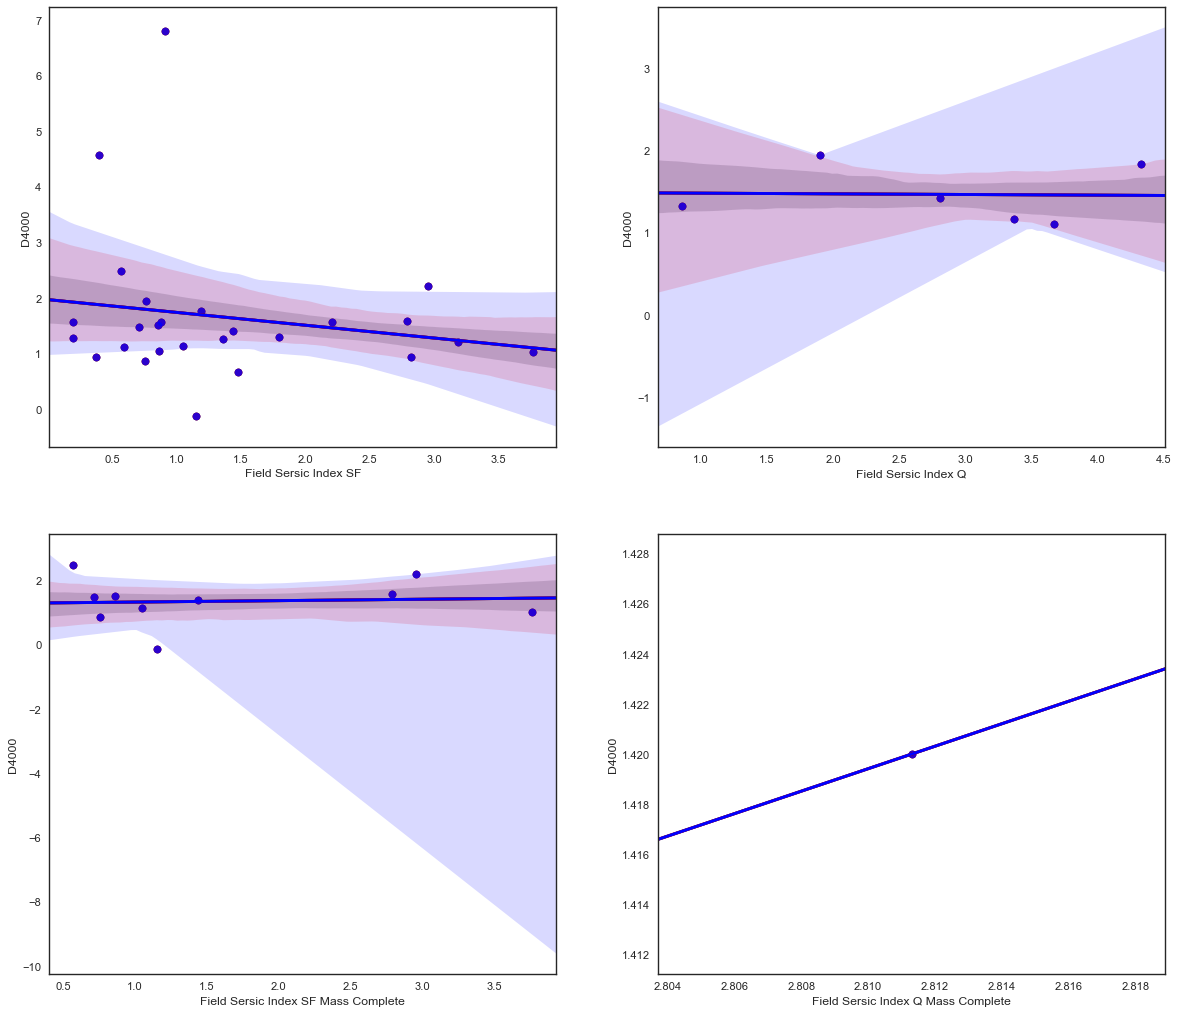

In [167]:
ax = sns.set(style="white", color_codes=True)
ax=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
ax = subplot(2,2,1)
x, y = pd.Series(f_n[np.where(f_flag>0.9)], name="Field Sersic Index SF"), pd.Series(f_dk[np.where(f_flag>0.9)], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
print ("Spearman Rank")  
print scipy.stats.stats.spearmanr(x, y)[0]
ax = subplot(2,2,2)
x, y = pd.Series(f_n[np.where(f_flag<0.9)], name="Field Sersic Index Q"), pd.Series(f_dk[np.where(f_flag<0.9)], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
print scipy.stats.stats.spearmanr(x, y)[0]
ax = subplot(2,2,3)
x, y = pd.Series(f_n[np.where(np.logical_and(f_flag>0.9,f_lmass>10.20))], name="Field Sersic Index SF Mass Complete"), pd.Series(f_dk[np.where(np.logical_and(f_flag>0.9,f_lmass>10.20))], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
print scipy.stats.stats.spearmanr(x, y)[0]
ax = subplot(2,2,4)
x, y = pd.Series(f_n[np.where(np.logical_and(f_flag<0.9,f_lmass>10.20))], name="Field Sersic Index Q Mass Complete"), pd.Series(f_dk[np.where(np.logical_and(f_flag<0.9,f_lmass>10.20))], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
print scipy.stats.stats.spearmanr(x, y)[0]



0.333333333333
0.304635844062
0.142857142857
0.450468731348


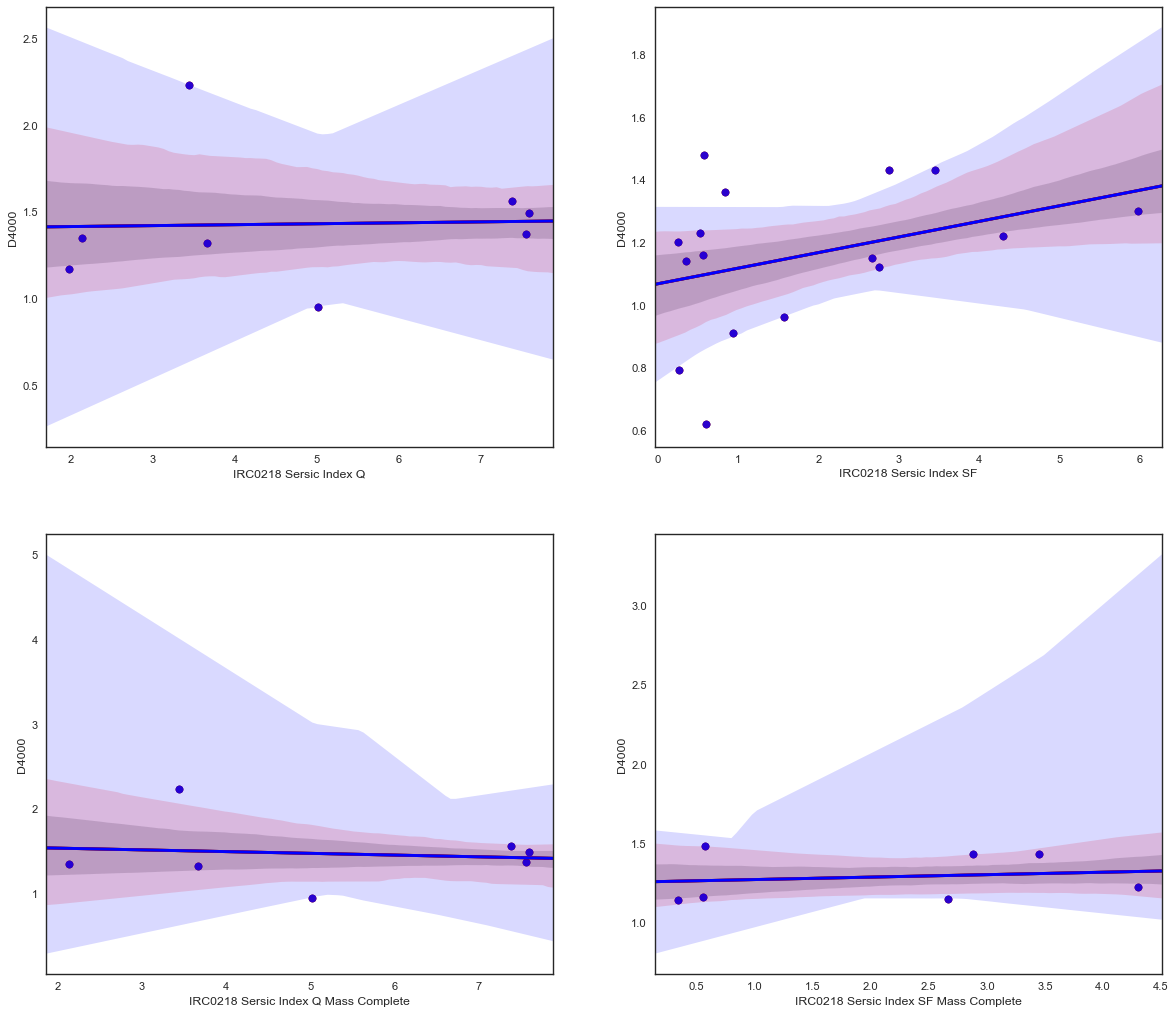

In [168]:
ax = sns.set(style="white", color_codes=True)
ax=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
ax = subplot(2,2,1)
x, y = pd.Series(c_n[np.where(c_flag<0.9)], name="IRC0218 Sersic Index Q"), pd.Series(c_dk[np.where(c_flag<0.9)], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
print scipy.stats.stats.spearmanr(x, y)[0]
ax = subplot(2,2,2)
x, y = pd.Series(c_n[np.where(c_flag>0.9)], name="IRC0218 Sersic Index SF"), pd.Series(c_dk[np.where(c_flag>0.9)], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
print scipy.stats.stats.spearmanr(x, y)[0]
ax = subplot(2,2,3)
x, y = pd.Series(c_n[np.where(np.logical_and(c_flag<0.9,c_lmass>10.20))], name="IRC0218 Sersic Index Q Mass Complete"), pd.Series(c_dk[np.where(np.logical_and(c_flag<0.9,c_lmass>10.20))], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
print scipy.stats.stats.spearmanr(x, y)[0]
ax = subplot(2,2,4)
x, y = pd.Series(c_n[np.where(np.logical_and(c_flag>0.9,c_lmass>10.20))], name="IRC0218 Sersic Index SF Mass Complete"), pd.Series(c_dk[np.where(np.logical_and(c_flag>0.9,c_lmass>10.20))], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
print scipy.stats.stats.spearmanr(x, y)[0]


-0.303455425122
-0.2
-0.115151515152
nan


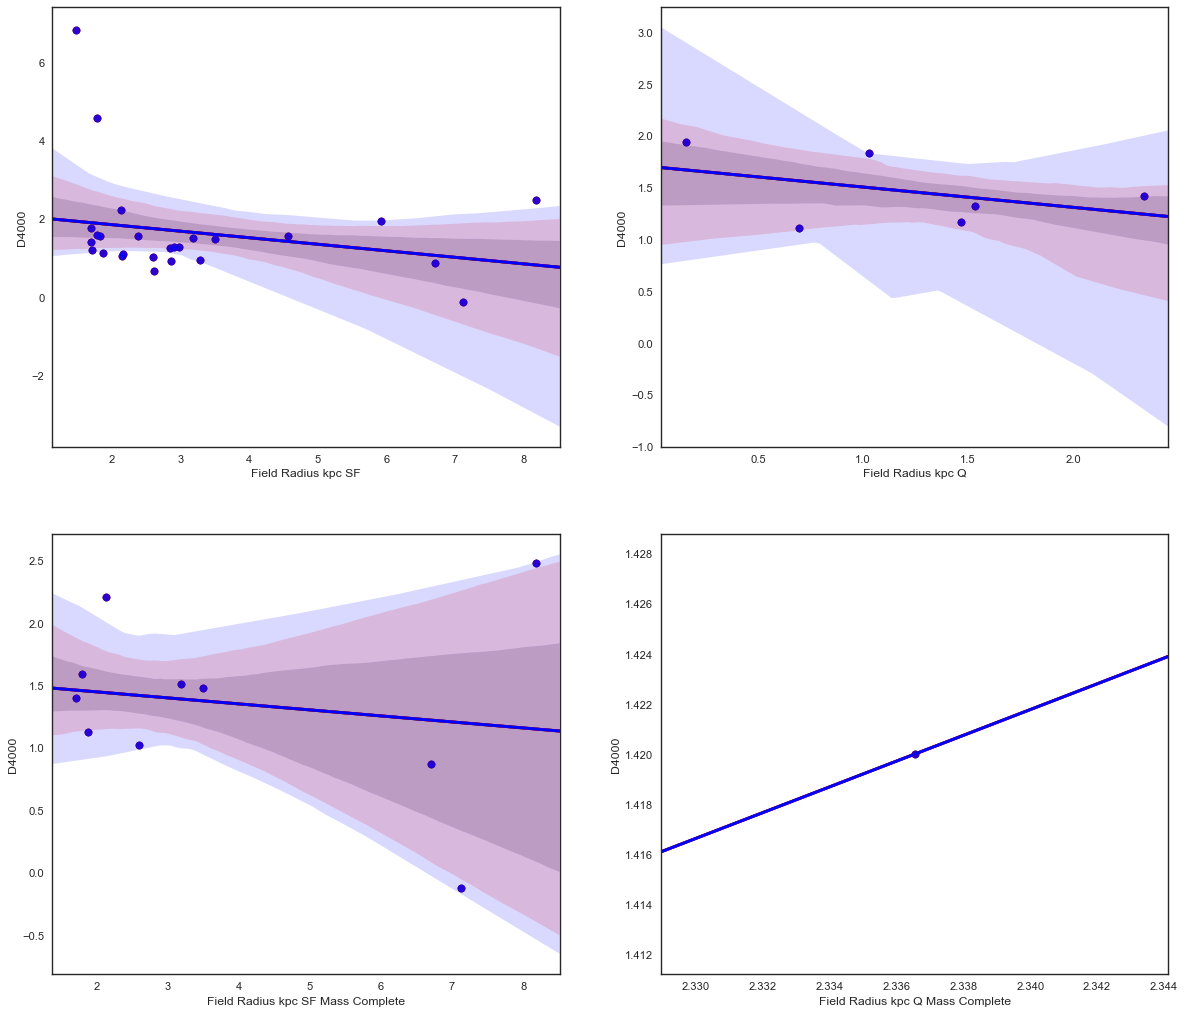

In [169]:
ax = sns.set(style="white", color_codes=True)
ax=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
ax = subplot(2,2,1)
x, y = pd.Series(f_re_kpc[np.where(f_flag>0.9)], name="Field Radius kpc SF"), pd.Series(f_dk[np.where(f_flag>0.9)], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
print scipy.stats.stats.spearmanr(x, y)[0]
ax = subplot(2,2,2)
x, y = pd.Series(f_re_kpc[np.where(f_flag<0.9)], name="Field Radius kpc Q"), pd.Series(f_dk[np.where(f_flag<0.9)], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
print scipy.stats.stats.spearmanr(x, y)[0]
ax = subplot(2,2,3)
x, y = pd.Series(f_re_kpc[np.where(np.logical_and(f_flag>0.9,f_lmass>10.20))], name="Field Radius kpc SF Mass Complete"), pd.Series(f_dk[np.where(np.logical_and(f_flag>0.9,f_lmass>10.20))], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
print scipy.stats.stats.spearmanr(x, y)[0]
ax = subplot(2,2,4)
x, y = pd.Series(f_re_kpc[np.where(np.logical_and(f_flag<0.9,f_lmass>10.20))], name="Field Radius kpc Q Mass Complete"), pd.Series(f_dk[np.where(np.logical_and(f_flag<0.9,f_lmass>10.20))], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
print scipy.stats.stats.spearmanr(x, y)[0]


0.238095238095
0.223693953128
-0.0357142857143
-0.0900937462696


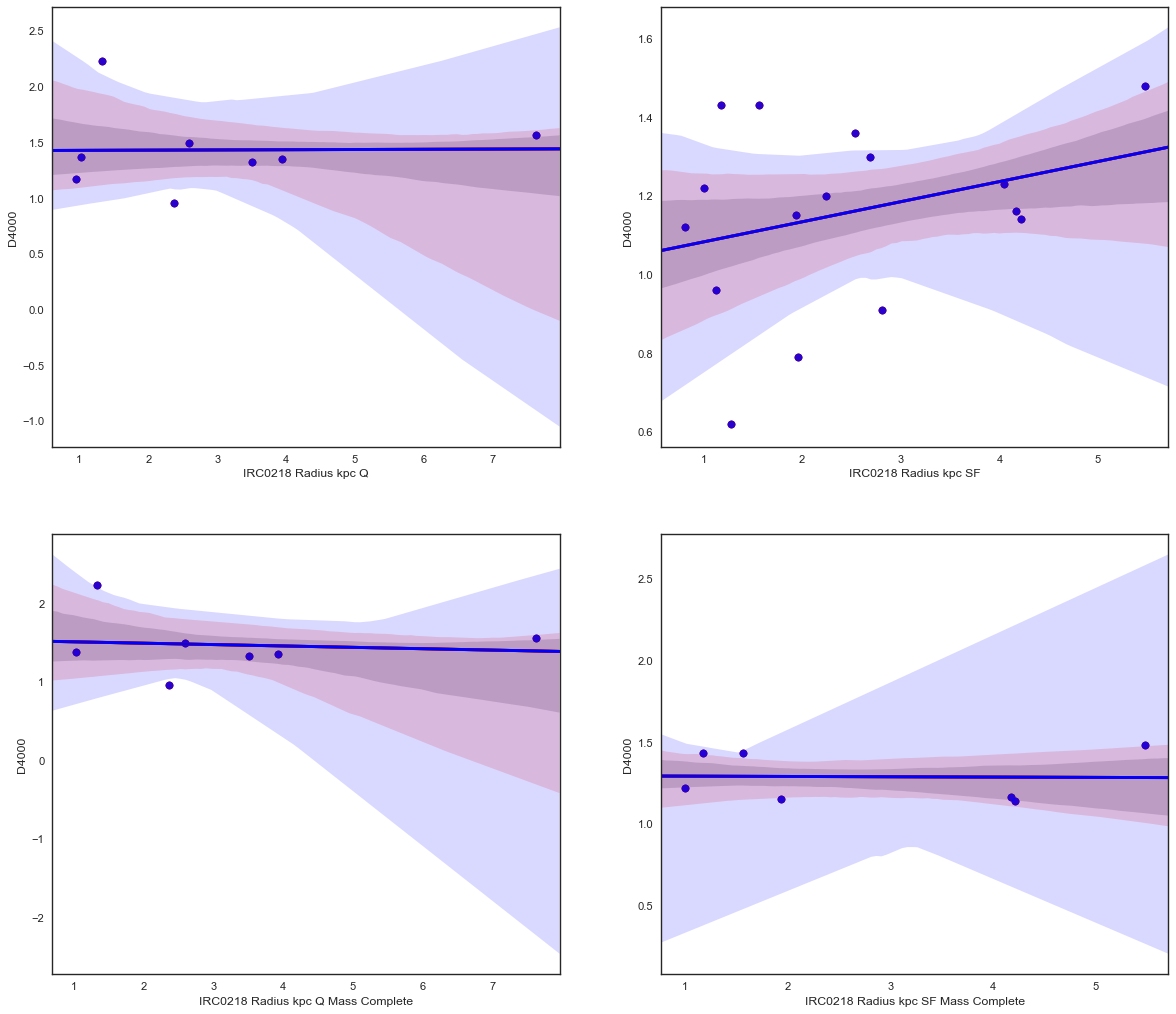

In [170]:
ax = sns.set(style="white", color_codes=True)
ax = plt.figure(figsize=(18, 16), dpi= 80, facecolor='none', edgecolor='k')
ax = subplot(2,2,1)
x, y = pd.Series(c_re_kpc[np.where(c_flag<0.9)], name="IRC0218 Radius kpc Q"), pd.Series(c_dk[np.where(c_flag<0.9)], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
print scipy.stats.stats.spearmanr(x, y)[0]
ax = subplot(2,2,2)
x, y = pd.Series(c_re_kpc[np.where(c_flag>0.9)], name="IRC0218 Radius kpc SF"), pd.Series(c_dk[np.where(c_flag>0.9)], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
print scipy.stats.stats.spearmanr(x, y)[0]
ax = subplot(2,2,3)
x, y = pd.Series(c_re_kpc[np.where(np.logical_and(c_flag<0.9,c_lmass>10.20))], name="IRC0218 Radius kpc Q Mass Complete"), pd.Series(c_dk[np.where(np.logical_and(c_flag<0.9,c_lmass>10.20))], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
print scipy.stats.stats.spearmanr(x, y)[0]
ax = subplot(2,2,4)
x, y = pd.Series(c_re_kpc[np.where(np.logical_and(c_flag>0.9,c_lmass>10.20))], name="IRC0218 Radius kpc SF Mass Complete"), pd.Series(c_dk[np.where(np.logical_and(c_flag>0.9,c_lmass>10.20))], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
print scipy.stats.stats.spearmanr(x, y)[0]


0.547619047619
0.473490427099
0.357142857143
-0.190909090909


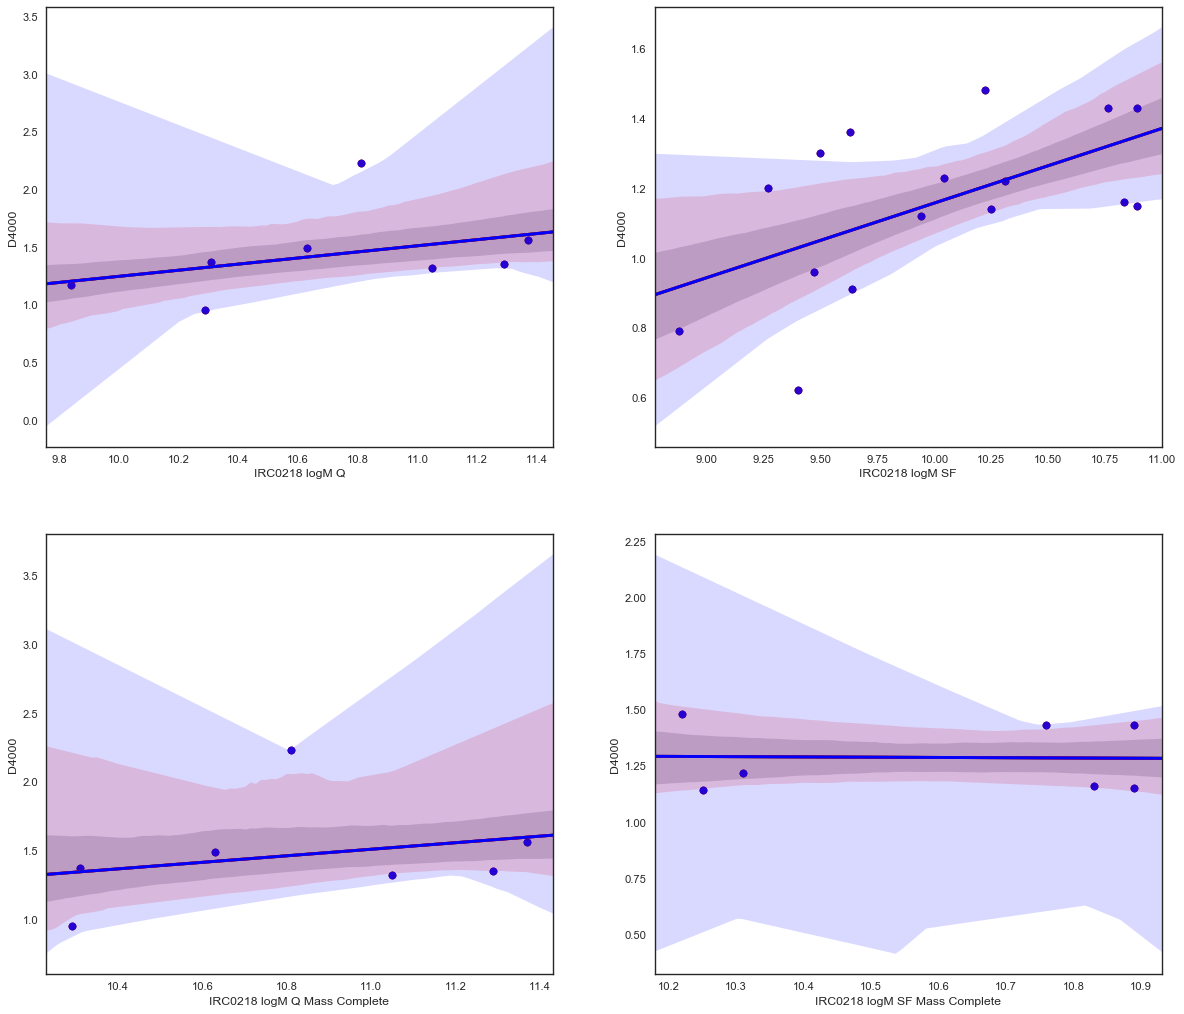

In [171]:
ax = sns.set(style="white", color_codes=True)
ax = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
ax = subplot(2,2,1)
x, y = pd.Series(c_lmass[np.where(c_flag<0.9)], name="IRC0218 logM Q"), pd.Series(c_dk[np.where(c_flag<0.9)], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
print scipy.stats.stats.spearmanr(x, y)[0]
ax = subplot(2,2,2)
x, y = pd.Series(c_lmass[np.where(c_flag>0.9)], name="IRC0218 logM SF"), pd.Series(c_dk[np.where(c_flag>0.9)], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
print scipy.stats.stats.spearmanr(x, y)[0]
ax = subplot(2,2,3)
x, y = pd.Series(c_lmass[np.where(np.logical_and(c_flag<0.9,c_lmass>10.20))], name="IRC0218 logM Q Mass Complete"), pd.Series(c_dk[np.where(np.logical_and(c_flag<0.9,c_lmass>10.20))], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
print scipy.stats.stats.spearmanr(x, y)[0]
ax = subplot(2,2,4)
x, y = pd.Series(c_lmass[np.where(np.logical_and(c_flag>0.9,c_lmass>10.20))], name="IRC0218 logM SF Mass Complete"), pd.Series(c_dk[np.where(np.logical_and(c_flag>0.9,c_lmass>10.20))], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
print scipy.stats.stats.spearmanr(x, y)[0]

-0.0857142857143
-0.0721984697322
nan
0.0666666666667


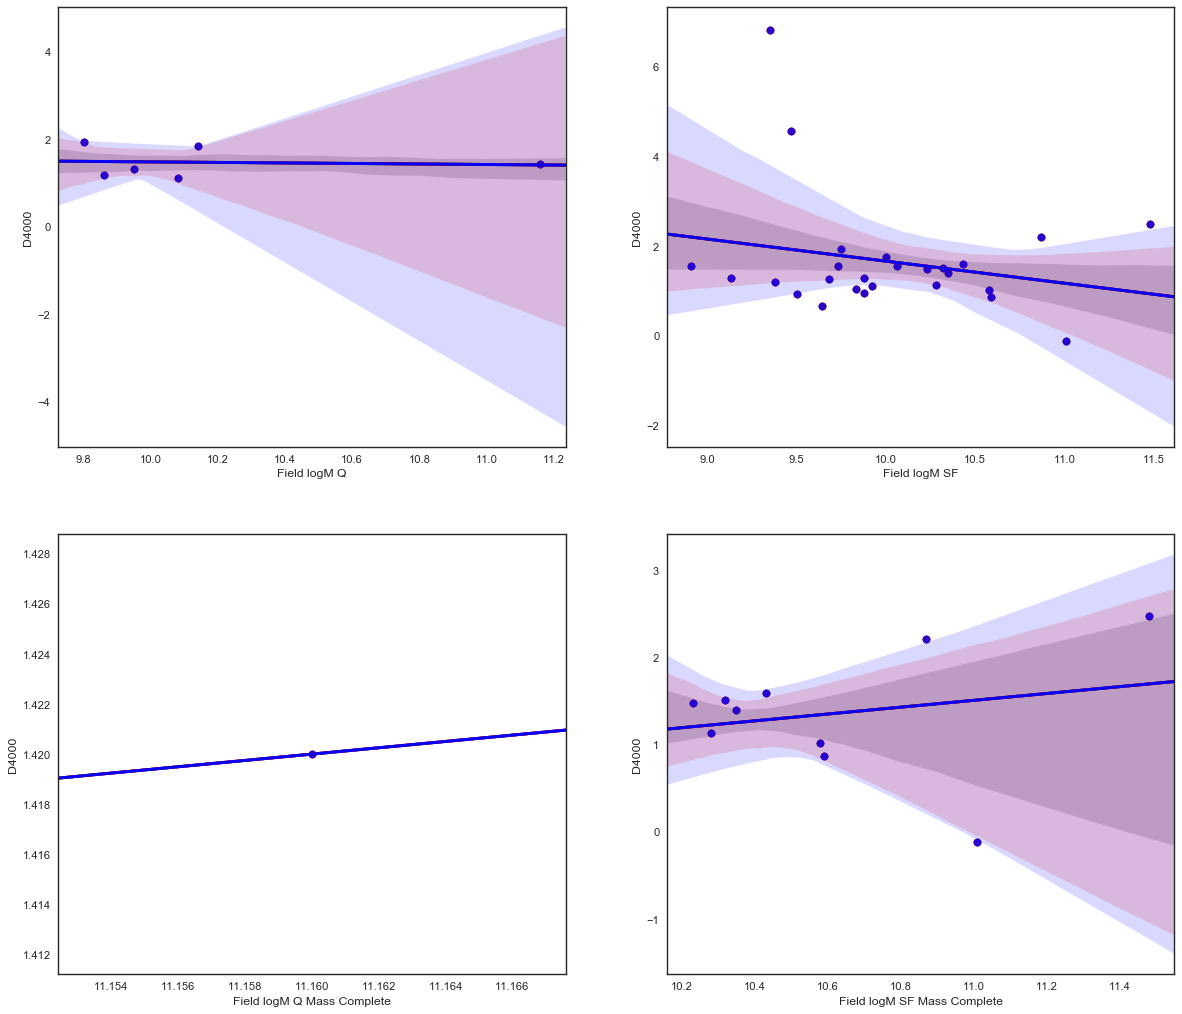

In [172]:
ax = sns.set(style="white", color_codes=True)
ax = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
ax = subplot(2,2,1)
x, y = pd.Series(f_lmass[np.where(f_flag<0.9)], name="Field logM Q"), pd.Series(f_dk[np.where(f_flag<0.9)], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
print scipy.stats.stats.spearmanr(x, y)[0]
ax = subplot(2,2,2)
x, y = pd.Series(f_lmass[np.where(f_flag>0.9)], name="Field logM SF"), pd.Series(f_dk[np.where(f_flag>0.9)], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
print scipy.stats.stats.spearmanr(x, y)[0]
ax = subplot(2,2,3)
x, y = pd.Series(f_lmass[np.where(np.logical_and(f_flag<0.9,f_lmass>10.20))], name="Field logM Q Mass Complete"), pd.Series(f_dk[np.where(np.logical_and(f_flag<0.9,f_lmass>10.20))], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
print scipy.stats.stats.spearmanr(x, y)[0]
ax = subplot(2,2,4)
x, y = pd.Series(f_lmass[np.where(np.logical_and(f_flag>0.9,f_lmass>10.20))], name="Field logM SF Mass Complete"), pd.Series(f_dk[np.where(np.logical_and(f_flag>0.9,f_lmass>10.20))], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
print scipy.stats.stats.spearmanr(x, y)[0]

-0.238095238095
-0.201618891964
0.0357142857143
0.0900937462696


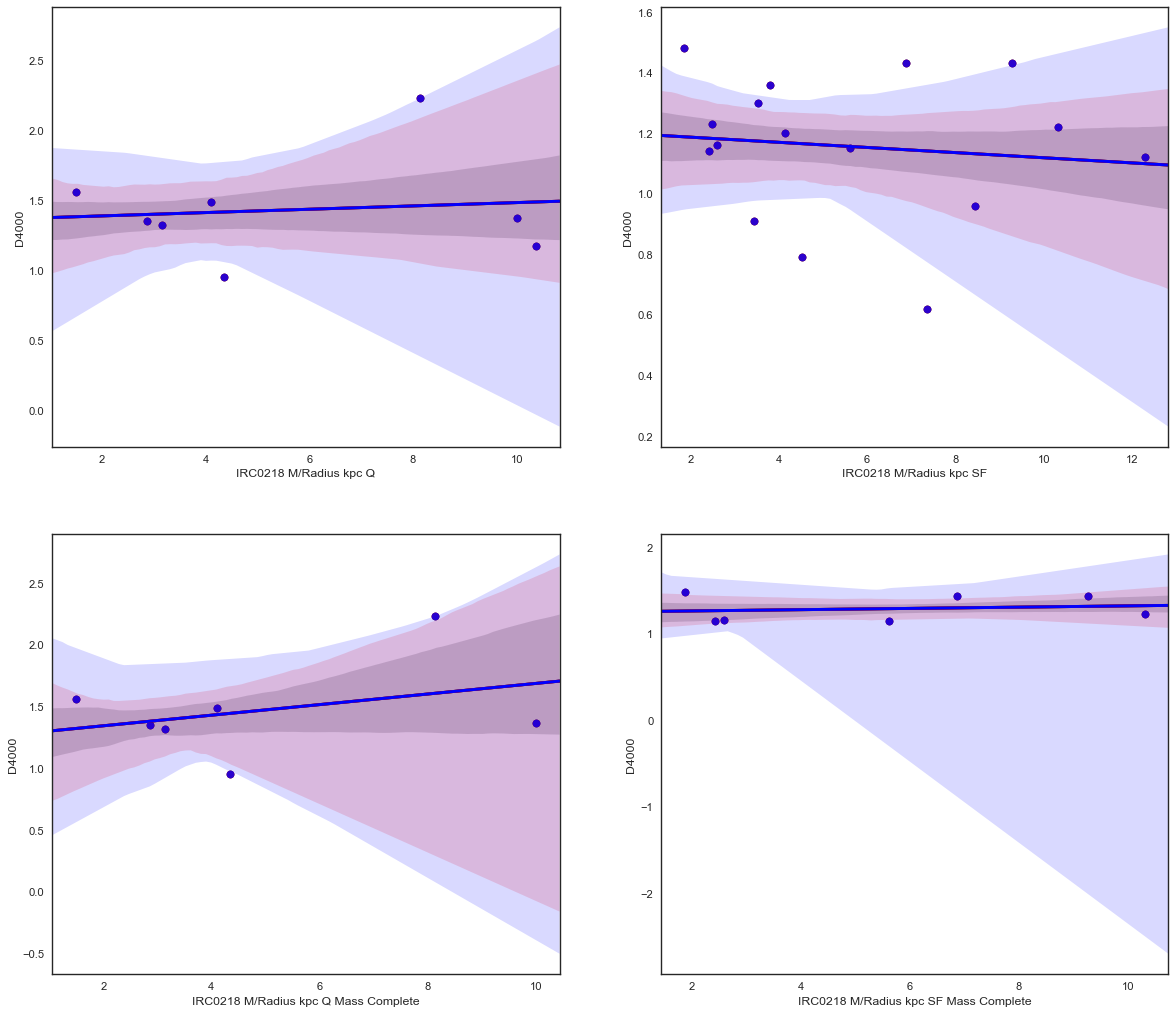

In [173]:
ax = sns.set(style="white", color_codes=True)
ax = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
ax = subplot(2,2,1)
x, y = pd.Series(c_lmass[np.where(c_flag<0.9)]/c_re_kpc[np.where(c_flag<0.9)], name="IRC0218 M/Radius kpc Q"), pd.Series(c_dk[np.where(c_flag<0.9)], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
print scipy.stats.stats.spearmanr(x, y)[0]
ax = subplot(2,2,2)
x, y = pd.Series(c_lmass[np.where(c_flag>0.9)]/c_re_kpc[np.where(c_flag>0.9)], name="IRC0218 M/Radius kpc SF"), pd.Series(c_dk[np.where(c_flag>0.9)], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
print scipy.stats.stats.spearmanr(x, y)[0]
ax = subplot(2,2,3)
x, y = pd.Series(c_lmass[np.where(np.logical_and(c_flag<0.9,c_lmass>10.20))]/c_re_kpc[np.where(np.logical_and(c_flag<0.9,c_lmass>10.20))], name="IRC0218 M/Radius kpc Q Mass Complete"), pd.Series(c_dk[np.where(np.logical_and(c_flag<0.9,c_lmass>10.20))], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
print scipy.stats.stats.spearmanr(x, y)[0]
ax = subplot(2,2,4)
x, y = pd.Series(c_lmass[np.where(np.logical_and(c_flag>0.9,c_lmass>10.20))]/c_re_kpc[np.where(np.logical_and(c_flag>0.9,c_lmass>10.20))], name="IRC0218 M/Radius kpc SF Mass Complete"), pd.Series(c_dk[np.where(np.logical_and(c_flag>0.9,c_lmass>10.20))], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
print scipy.stats.stats.spearmanr(x, y)[0]

-0.238095238095
-0.201618891964
0.0357142857143
0.0900937462696


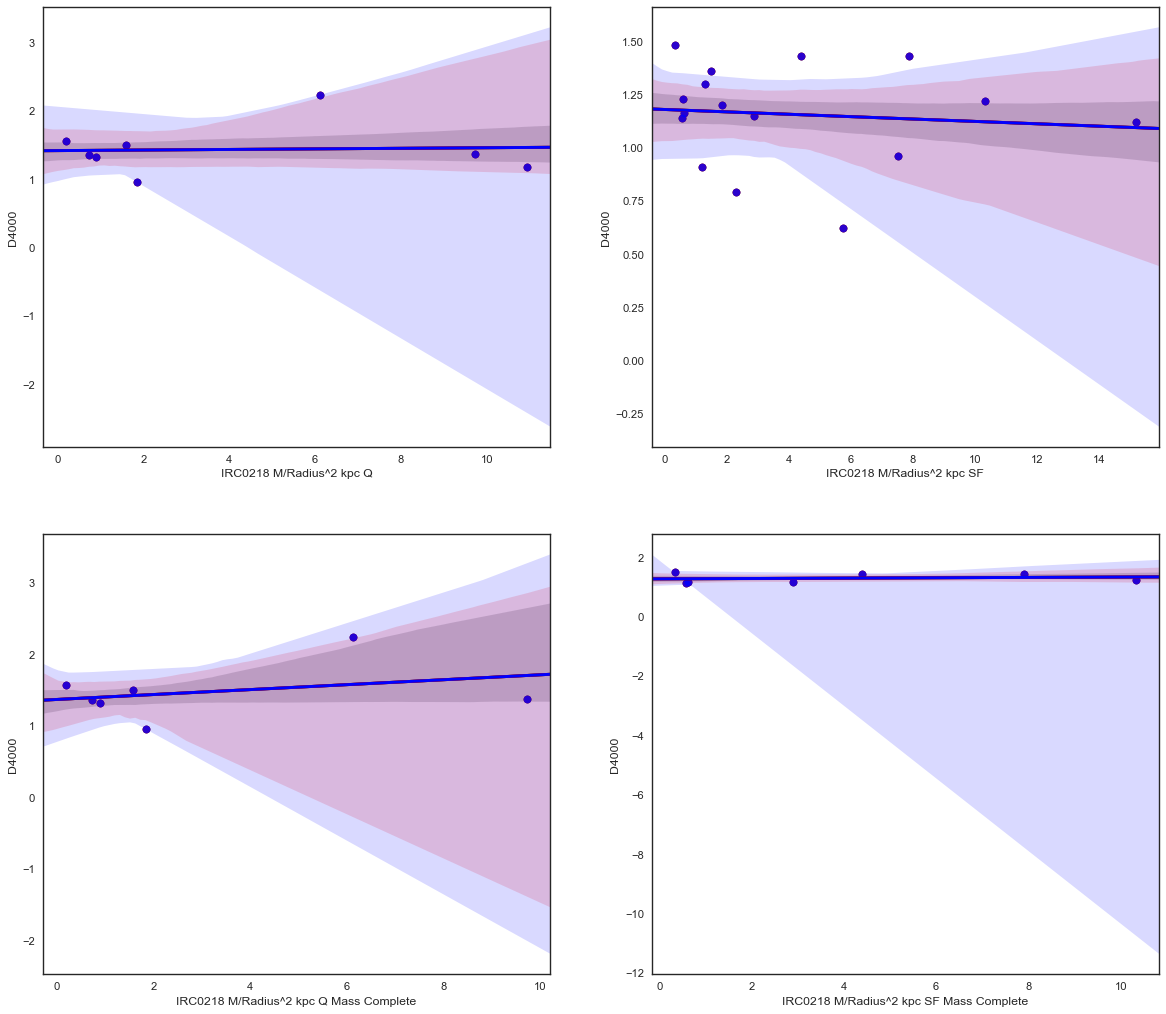

In [166]:
ax = sns.set(style="white", color_codes=True)
ax=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
ax = subplot(2,2,1)
x, y = pd.Series(c_lmass[np.where(c_flag<0.9)]/c_re_kpc[np.where(c_flag<0.9)]**2, name="IRC0218 M/Radius^2 kpc Q"), pd.Series(c_dk[np.where(c_flag<0.9)], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
print scipy.stats.stats.spearmanr(x, y)[0]
ax = subplot(2,2,2)
x, y = pd.Series(c_lmass[np.where(c_flag>0.9)]/c_re_kpc[np.where(c_flag>0.9)]**2, name="IRC0218 M/Radius^2 kpc SF"), pd.Series(c_dk[np.where(c_flag>0.9)], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
print scipy.stats.stats.spearmanr(x, y)[0]
ax = subplot(2,2,3)
x, y = pd.Series(c_lmass[np.where(np.logical_and(c_flag<0.9,c_lmass>10.20))]/c_re_kpc[np.where(np.logical_and(c_flag<0.9,c_lmass>10.20))]**2, name="IRC0218 M/Radius^2 kpc Q Mass Complete"), pd.Series(c_dk[np.where(np.logical_and(c_flag<0.9,c_lmass>10.20))], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
print scipy.stats.stats.spearmanr(x, y)[0]
ax = subplot(2,2,4)
x, y = pd.Series(c_lmass[np.where(np.logical_and(c_flag>0.9,c_lmass>10.20))]/c_re_kpc[np.where(np.logical_and(c_flag>0.9,c_lmass>10.20))]**2, name="IRC0218 M/Radius^2 kpc SF Mass Complete"), pd.Series(c_dk[np.where(np.logical_and(c_flag>0.9,c_lmass>10.20))], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
print scipy.stats.stats.spearmanr(x, y)[0]

-0.238095238095
-0.223693953128
0.0357142857143


ValueError: err must be [ scalar | N, Nx1 or 2xN array-like ]

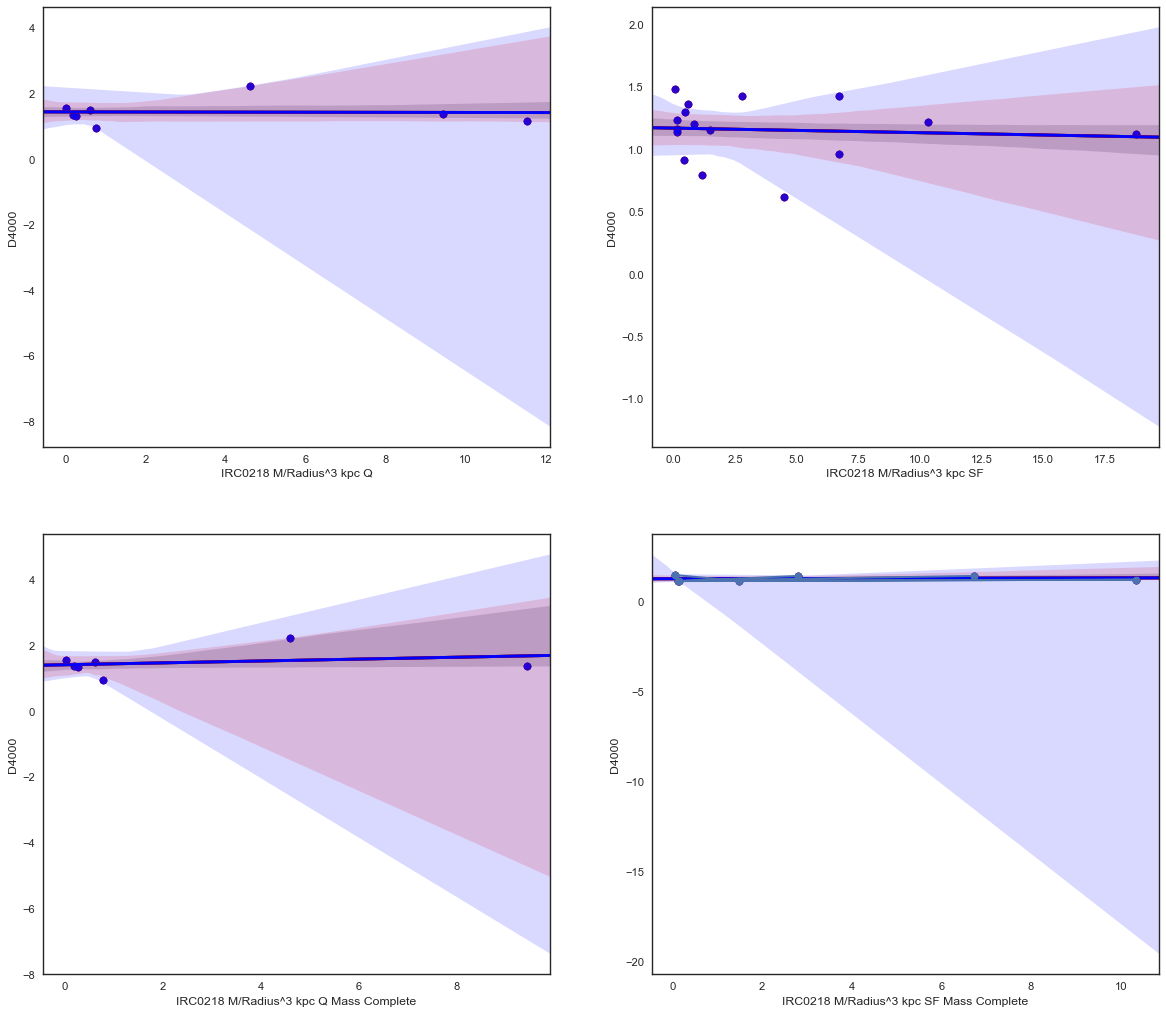

In [179]:
ax = sns.set(style="white", color_codes=True)
ax=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
ax = subplot(2,2,1)
x, y = pd.Series(c_lmass[np.where(c_flag<0.9)]/c_re_kpc[np.where(c_flag<0.9)]**3, name="IRC0218 M/Radius^3 kpc Q"), pd.Series(c_dk[np.where(c_flag<0.9)], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
print scipy.stats.stats.spearmanr(x, y)[0]
ax = subplot(2,2,2)
x, y = pd.Series(c_lmass[np.where(c_flag>0.9)]/c_re_kpc[np.where(c_flag>0.9)]**3, name="IRC0218 M/Radius^3 kpc SF"), pd.Series(c_dk[np.where(c_flag>0.9)], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
print scipy.stats.stats.spearmanr(x, y)[0]
ax = subplot(2,2,3)
x, y = pd.Series(c_lmass[np.where(np.logical_and(c_flag<0.9,c_lmass>10.20))]/c_re_kpc[np.where(np.logical_and(c_flag<0.9,c_lmass>10.20))]**3, name="IRC0218 M/Radius^3 kpc Q Mass Complete"), pd.Series(c_dk[np.where(np.logical_and(c_flag<0.9,c_lmass>10.20))], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
print scipy.stats.stats.spearmanr(x, y)[0]
ax = subplot(2,2,4)
x, y = pd.Series(c_lmass[np.where(np.logical_and(c_flag>0.9,c_lmass>10.20))]/c_re_kpc[np.where(np.logical_and(c_flag>0.9,c_lmass>10.20))]**3, name="IRC0218 M/Radius^3 kpc SF Mass Complete"), pd.Series(c_dk[np.where(np.logical_and(c_flag>0.9,c_lmass>10.20))], name="D4000")
ax = sns.regplot(x=x, y=y, ci=68,n_boot=1000,color='black')
ax = sns.regplot(x=x, y=y, ci=95,n_boot=1000,color='red')
ax = sns.regplot(x=x, y=y, ci=99.7,n_boot=1000,color='blue')
ax = errorbar(x, y, yerr=c_dk_err, fmt='-o') #fmt=None to plot bars only
print scipy.stats.stats.spearmanr(x, y)[0]